In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-78.68030956555073 -156.71011503949728
77.30076479326087 -47.60490205853975
80.33761227427055 27.370439156921208
-32.06761138225587 -43.64241966294131
55.73647753166168 -165.04904203939645
-10.251643447388858 -23.39299898115408
-87.14417845435025 -91.18209938695826
-22.69234736528678 -66.72950177952016
77.82028687976833 63.351132254746034
-65.90361528438929 165.31924351002726
76.8784669943557 108.68605240333403
69.42767673740138 21.484411369941
64.4226110596407 -34.38225945387629
81.8050236314846 -94.53778870256824
-81.1808401664953 -70.85126514495684
84.85232379992257 -164.0803689247913
-50.040797087868654 41.59973806558796
-89.34765540927333 120.01462251228497
-3.689348344503145 12.95765024522126
17.680121712657737 4.950425403325511
13.81405909141813 107.53084541895521
12.32241245312369 146.89293518302225
21.06308782289763 -28.51831337085605
32.81357379563737 3.169184214910274
12.119057902949919 -9.85737079372484
-70.49517122622981 150.5099496975185
29.70336080054129 -149.21763426886

80.37993269712231 17.06662140864225
-30.788418552678657 84.55467799706133
43.83556603466599 -101.18658846383025
-73.89461406540207 -141.21457435824993
86.1643952634499 -89.07900993064243
-8.291148721723573 178.57278492184201
73.83588755859827 55.29882111999248
41.12870609709077 -138.10804977845757
69.58795891699324 91.69142570675842
78.65723356097874 -138.47250082340648
-51.76532270025765 146.1080937036889
-22.747580755833425 -94.42975739228233
-60.53515238915393 -118.80306286323818
-37.258635482939134 -54.08479216088284
-1.798940558317895 154.0029266936195
-27.999053242161033 110.98128234545754
-26.1379437837738 13.706475589295849
82.02261853664177 119.70260744921666
-17.085863413899673 -57.503192841465335
-20.720335405082153 124.70397900419783
73.52422156688499 -87.30351273083343
-65.08258809160166 11.650676247711374
-65.1961419198166 -125.00940941841958
68.68093948239601 86.26525425532014
-48.37917190637397 -151.2537925122559
86.00792173006766 -179.99968242205665
-2.9598749665213404

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters.
record_count = 1
set_count = 1

In [ ]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    print city_url
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | mataura
Processing Record 2 of Set 13 | ilulissat
Processing Record 3 of Set 13 | mehamn
Processing Record 4 of Set 13 | laguna
Processing Record 5 of Set 13 | bethel
Processing Record 6 of Set 13 | georgetown
Processing Record 7 of Set 13 | punta arenas
Processing Record 8 of Set 13 | villazon
Processing Record 9 of Set 13 | amderma
City not found. Skipping...
Processing Record 10 of Set 13 | bluff
Processing Record 11 of Set 13 | saskylakh
Processing Record 12 of Set 13 | sorkjosen
Processing Record 13 of Set 13 | tasiilaq
Processing Record 14 of Set 13 | qaanaaq
Processing Record 15 of Set 13 | ushuaia
Processing Record 16 of Set 13 | barrow
Processing Record 17 of Set 13 | east london
Processing Record 18 of Set 13 | new norfolk
Processing Record 19 of Set 13 | sibiti
Processing Record 20 of Set 13 | abalak
Processing Record 21 of Set 13 | play cu
City not found. Skipping...
Processing Record 22 of Set 13 | airai
Processing Record 23 of Set 13 | pont

Processing Record 37 of Set 16 | aloleng
Processing Record 38 of Set 16 | nador
Processing Record 39 of Set 16 | katsuura
Processing Record 40 of Set 16 | nanortalik
Processing Record 41 of Set 16 | palatka
Processing Record 42 of Set 16 | sitka
Processing Record 43 of Set 16 | kavaratti
Processing Record 44 of Set 16 | hithadhoo
Processing Record 45 of Set 16 | barstow
Processing Record 46 of Set 16 | cidreira
Processing Record 47 of Set 16 | sulangan
Processing Record 48 of Set 16 | tsihombe
City not found. Skipping...
Processing Record 49 of Set 16 | paramonga
Processing Record 50 of Set 16 | santo antonio do taua
Processing Record 1 of Set 17 | cherepovets
Processing Record 2 of Set 17 | anadyr
Processing Record 3 of Set 17 | solovetskiy
City not found. Skipping...
Processing Record 4 of Set 17 | lichinga
Processing Record 5 of Set 17 | dudinka
Processing Record 6 of Set 17 | praia da vitoria
Processing Record 7 of Set 17 | sola
Processing Record 8 of Set 17 | nyurba
Processing Rec

Processing Record 24 of Set 20 | hovd
Processing Record 25 of Set 20 | vondrozo
Processing Record 26 of Set 20 | albury
Processing Record 27 of Set 20 | palabuhanratu
City not found. Skipping...
Processing Record 28 of Set 20 | nizhneyansk
City not found. Skipping...
Processing Record 29 of Set 20 | codrington
Processing Record 30 of Set 20 | bengkulu
Processing Record 31 of Set 20 | samarai
Processing Record 32 of Set 20 | saint pete beach
Processing Record 33 of Set 20 | half moon bay
Processing Record 34 of Set 20 | villa carlos paz
Processing Record 35 of Set 20 | ridgecrest
Processing Record 36 of Set 20 | slyudyanka
Processing Record 37 of Set 20 | rocha
Processing Record 38 of Set 20 | sibolga
Processing Record 39 of Set 20 | sao joao da barra
Processing Record 40 of Set 20 | fairbanks
Processing Record 41 of Set 20 | beloha
Processing Record 42 of Set 20 | vila franca do campo
Processing Record 43 of Set 20 | brae
Processing Record 44 of Set 20 | petropavlovsk-kamchatskiy
Proce

Processing Record 13 of Set 24 | honiara
Processing Record 14 of Set 24 | santiago del estero
Processing Record 15 of Set 24 | tefe
Processing Record 16 of Set 24 | kunya
Processing Record 17 of Set 24 | agnibilekrou
Processing Record 18 of Set 24 | el bagre
Processing Record 19 of Set 24 | luau
Processing Record 20 of Set 24 | dakar
Processing Record 21 of Set 24 | santa cruz del sur
Processing Record 22 of Set 24 | bay roberts
Processing Record 23 of Set 24 | machico
Processing Record 24 of Set 24 | acapulco
Processing Record 25 of Set 24 | burnie
Processing Record 26 of Set 24 | guelengdeng
City not found. Skipping...
Processing Record 27 of Set 24 | lake city
Processing Record 28 of Set 24 | batagay
Processing Record 29 of Set 24 | rawson
Processing Record 30 of Set 24 | jumla
Processing Record 31 of Set 24 | keti bandar
Processing Record 32 of Set 24 | yarim
Processing Record 33 of Set 24 | belyy
Processing Record 34 of Set 24 | tam ky
Processing Record 35 of Set 24 | grand gaube


In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,42.48,97,99,12.15,NZ,2022-10-05 02:13:04
1,Ilulissat,69.2167,-51.1000,32.02,47,17,3.44,GL,2022-10-05 02:13:22
2,Mehamn,71.0357,27.8492,39.15,93,75,4.61,NO,2022-10-05 02:16:48
3,Laguna,38.4210,-121.4238,83.75,48,0,6.91,US,2022-10-05 02:16:49
4,Bethel,41.3712,-73.4140,55.76,88,100,6.91,US,2022-10-05 02:16:49
5,Georgetown,5.4112,100.3354,83.89,83,20,1.14,MY,2022-10-05 02:14:23
6,Punta Arenas,-53.1500,-70.9167,42.91,81,75,12.66,CL,2022-10-05 02:13:16
7,Villazon,-22.0866,-65.5942,47.84,43,2,4.45,BO,2022-10-05 02:16:49
8,Bluff,-46.6000,168.3333,39.79,68,94,30.85,NZ,2022-10-05 02:16:50
9,Saskylakh,71.9167,114.0833,24.69,96,100,5.79,RU,2022-10-05 02:16:50


In [26]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-10-05 02:13:04,-46.1927,168.8643,42.48,97,99,12.15
1,Ilulissat,GL,2022-10-05 02:13:22,69.2167,-51.1000,32.02,47,17,3.44
2,Mehamn,NO,2022-10-05 02:16:48,71.0357,27.8492,39.15,93,75,4.61
3,Laguna,US,2022-10-05 02:16:49,38.4210,-121.4238,83.75,48,0,6.91
4,Bethel,US,2022-10-05 02:16:49,41.3712,-73.4140,55.76,88,100,6.91
5,Georgetown,MY,2022-10-05 02:14:23,5.4112,100.3354,83.89,83,20,1.14
6,Punta Arenas,CL,2022-10-05 02:13:16,-53.1500,-70.9167,42.91,81,75,12.66
7,Villazon,BO,2022-10-05 02:16:49,-22.0866,-65.5942,47.84,43,2,4.45
8,Bluff,NZ,2022-10-05 02:16:50,-46.6000,168.3333,39.79,68,94,30.85
9,Saskylakh,RU,2022-10-05 02:16:50,71.9167,114.0833,24.69,96,100,5.79


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

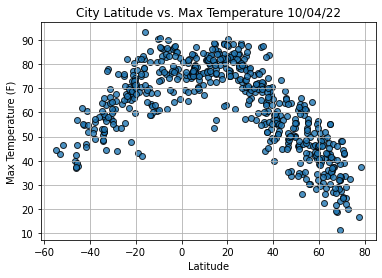

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

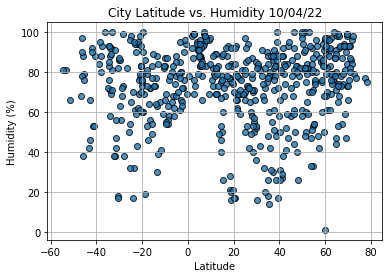

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

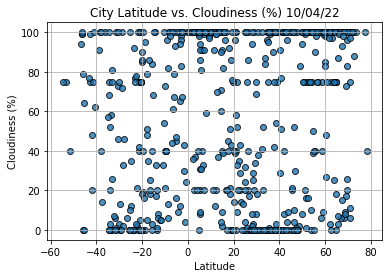

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

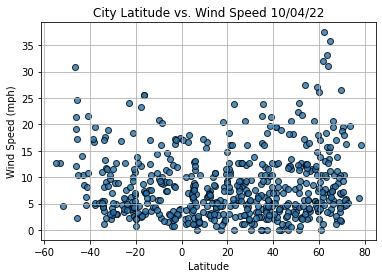

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [42]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [43]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2022-10-05 02:14:24
Lat                         -54.8
Lng                         -68.3
Max Temp                    44.26
Humidity                       81
Cloudiness                     75
Wind Speed                  12.66
Name: 13, dtype: object

In [44]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
567    False
568    False
569     True
570     True
571     True
Name: Lat, Length: 572, dtype: bool

In [45]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ilulissat,GL,2022-10-05 02:13:22,69.2167,-51.1000,32.02,47,17,3.44
2,Mehamn,NO,2022-10-05 02:16:48,71.0357,27.8492,39.15,93,75,4.61
3,Laguna,US,2022-10-05 02:16:49,38.4210,-121.4238,83.75,48,0,6.91
4,Bethel,US,2022-10-05 02:16:49,41.3712,-73.4140,55.76,88,100,6.91
5,Georgetown,MY,2022-10-05 02:14:23,5.4112,100.3354,83.89,83,20,1.14


In [47]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

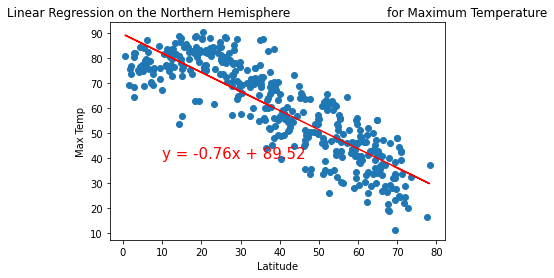

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

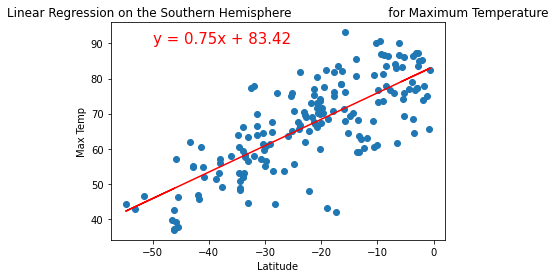

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

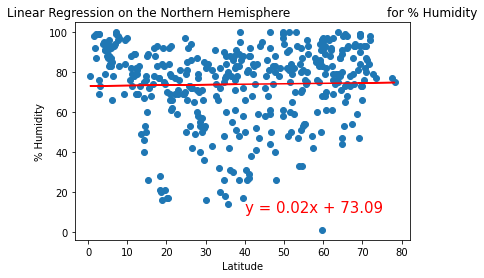

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

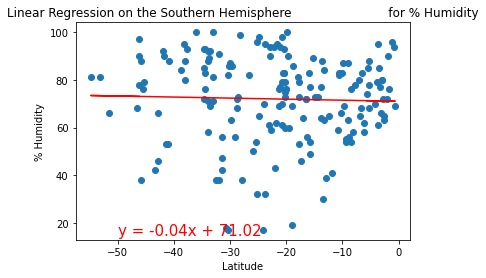

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

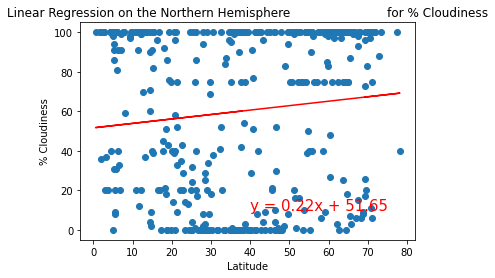

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

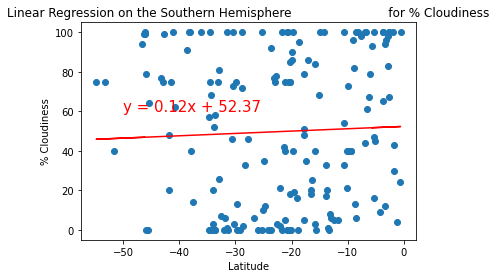

In [54]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

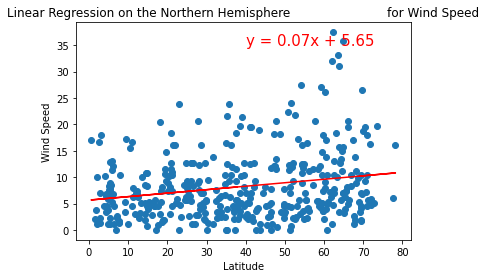

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

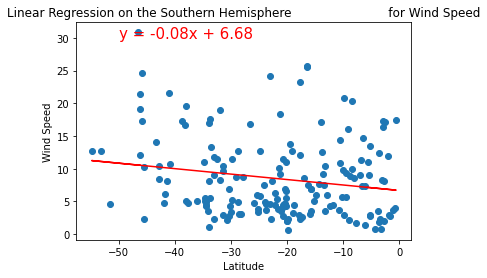

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,30))